In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# obs = np.load('traj09-1/critic_obs.npy')
# action = np.load('traj09-1/action.npy')

# obs = np.load('bullet_traj1/obs.npy')
# action = np.load('bullet_traj1/action.npy')

obs = np.load('mask/obs.npy')
action = np.load('mask/action.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'mask/obs.npy'

In [ ]:
print(obs[:,2][50:100])

[0.5603316  0.54632557 0.5362639  0.52436912 0.51099515 0.49660396
 0.49296821 0.47159958 0.46184273 0.45054693 0.44068469 0.42403724
 0.40486572 0.40203867 0.38435347 0.37487352 0.36458832 0.34884571
 0.33669787 0.3338127  0.32627295 0.31099029 0.29611451 0.295169
 0.2749147  0.26847558 0.25593713 0.24164618 0.23021547 0.22468557
 0.2143732  0.20821787 0.185827   0.18985472 0.17446276 0.16846954
 0.16092912 0.15048953 0.13456243 0.14136283 0.12362691 0.11379552
 0.11205986 0.10253759 0.09662308 0.0860988  0.06718273 0.06595088
 0.05918582 0.06321916]


0.05952415735049409


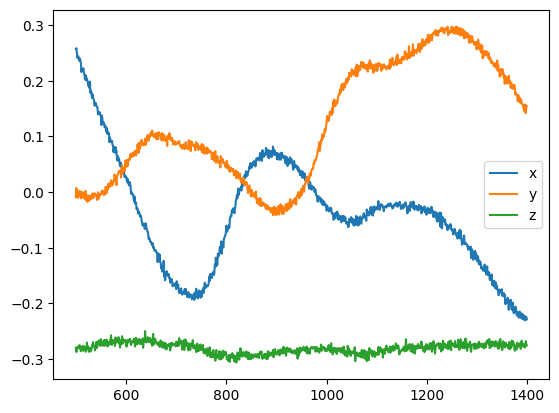

In [ ]:
length = 1400
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index[500:], obs[500:,0], label='x')
plt.plot(index[500:], obs[500:,1], label='y')
plt.plot(index[500:], obs[500:,2], label='z')
plt.legend()

# compute mse

mse = np.mean((obs[500:,0] - obs[500:,1])**2)
print(mse)

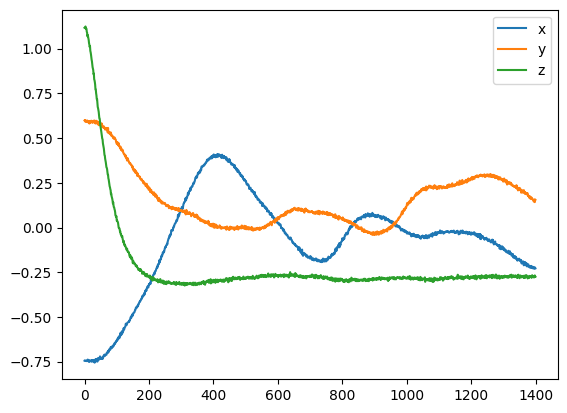

In [ ]:
plt.plot(index, obs[:,0], label='x')
plt.plot(index, obs[:,1], label='y')
plt.plot(index, obs[:,2], label='z')
plt.legend()


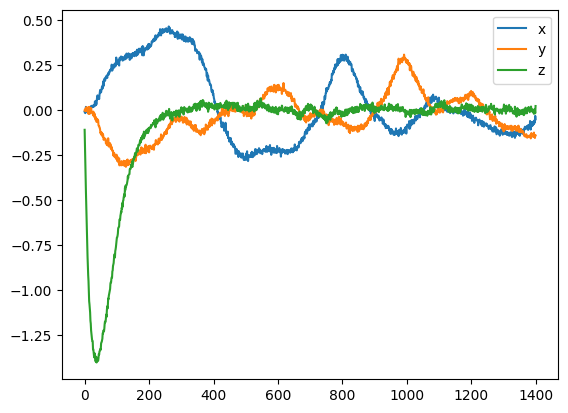

In [ ]:
# length = 700
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,3], label='x')
plt.plot(index, obs[:,4], label='y')
plt.plot(index, obs[:,5], label='z')
plt.legend()

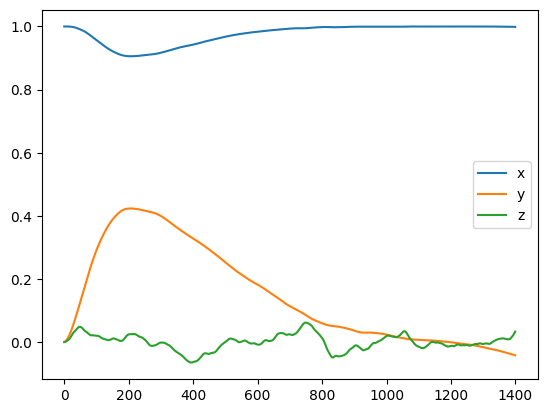

In [ ]:
# length = 700
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,6], label='x')
plt.plot(index, obs[:,7], label='y')
plt.plot(index, obs[:,8], label='z')
plt.legend()

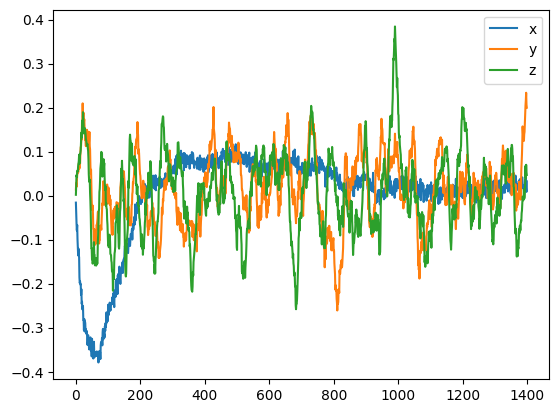

In [ ]:
plt.plot(index, obs[:,-1], label='x')
plt.plot(index, obs[:,-2], label='y')
plt.plot(index, obs[:,-3], label='z')
plt.legend()

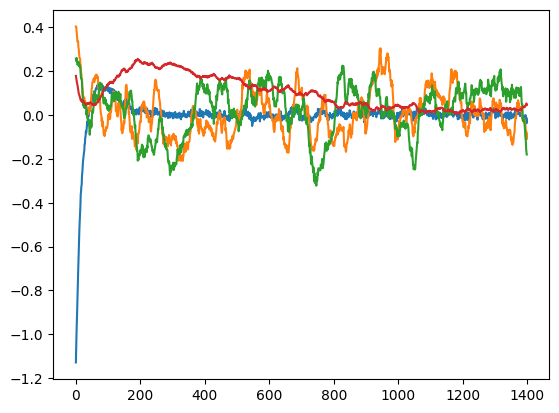

In [ ]:
plt.plot(action[:,])

In [ ]:
#旋转矩阵转欧拉角
import math
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6


# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :
    if not isRotationMatrix(R):
        u,s,v = np.linalg.svd(R.reshape(3,3))
        R = u @v
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [ ]:
rotation_matrix = obs[:, 6:15]

eulers = []

for i in range(len(rotation_matrix)):
    
    matrix = rotation_matrix[i].reshape(3, 3)
    euler = rotationMatrixToEulerAngles(matrix)
    eulers.append(euler)

eulers = np.vstack(eulers)

0.0033407911052293774


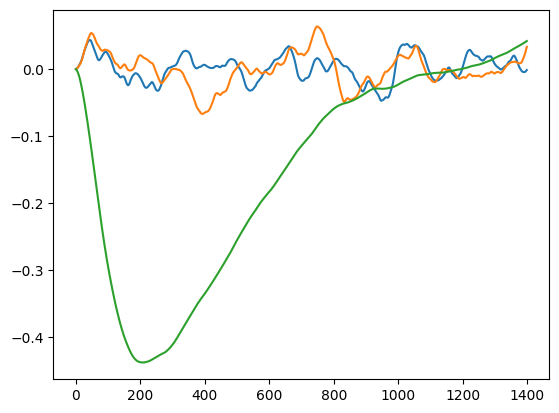

In [ ]:
plt.plot(index, eulers)

# compute the MSE

mse = np.mean((eulers[500:])**2)
print(mse)